### Without baseline

episode, reward = 100, 24.0
episode, reward = 200, 32.0
episode, reward = 300, 21.0
episode, reward = 400, 38.0
episode, reward = 500, 116.0
episode, reward = 600, 200.0
episode, reward = 700, 200.0
episode, reward = 800, 200.0
episode, reward = 900, 200.0
episode, reward = 1000, 200.0


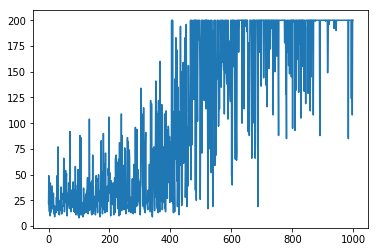

In [3]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from agent import Agent
%matplotlib inline

#Setup
env = gym.make('CartPole-v0')
input_dim, output_dim = env.observation_space.shape[0], env.action_space.n
agent = Agent(input_dim, output_dim)

EPISODES = 1000
scores = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state,[1,  input_dim])
    reward_sum = 0
    done = False
    for time in range(500):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, input_dim])
        agent.remember(state[0], action, reward)
        state = next_state
        reward_sum += reward
        if done:
            break
    agent.learn()
    scores.append(reward_sum)
    if e % 100 == 0:
        print('episode, reward = {}, {}'.format(e,reward_sum))
plt.plot(scores)

### With baseline

episode, reward = 100, 157.0
episode, reward = 200, 72.0
episode, reward = 300, 109.0
episode, reward = 400, 122.0
episode, reward = 500, 200.0
episode, reward = 600, 200.0
episode, reward = 700, 200.0
episode, reward = 800, 200.0
episode, reward = 900, 200.0
episode, reward = 1000, 200.0


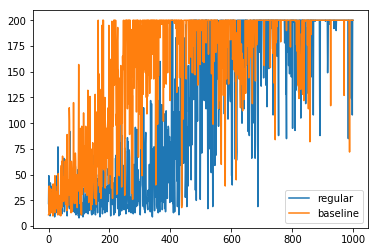

In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from agent_with_baseline import Agent
%matplotlib inline

#Setup
env = gym.make('CartPole-v0')
input_dim, output_dim = env.observation_space.shape[0], env.action_space.n
agent = Agent(input_dim, output_dim)

EPISODES = 1000
scores_baseline = []
for e in range(1,EPISODES+1):
    state = env.reset()
    state = np.reshape(state,[1,  input_dim])
    reward_sum = 0
    done = False
    for time in range(500):
        action = agent.act(state)
        next_state, reward, done, _ = env.step(action)
        next_state = np.reshape(next_state, [1, input_dim])
        agent.remember(state[0], action, reward)
        state = next_state
        reward_sum += reward
        if done:
            break
    agent.learn()
    scores_baseline.append(reward_sum)
    if e % 100 == 0:
        print('episode, reward = {}, {}'.format(e,reward_sum))
plt.plot(scores)
plt.plot(scores_baseline)
plt.legend(['regular', 'baseline'])